In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime

from statsmodels.tsa.seasonal import STL, seasonal_decompose

def date_parser(dt) :
    return datetime.strptime(dt, '%Y-%m').date()
    

airline_passengers = pd.read_csv('data/AirPassengers.csv', date_parser=date_parser, parse_dates=True, index_col=0)
airline_passengers.columns = ['Passengers']
airline_passengers.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


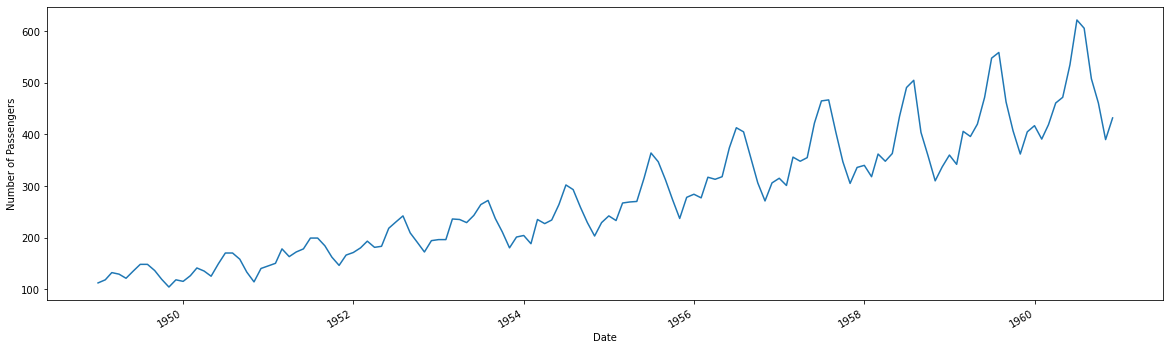

In [44]:
fig, ax = plt.subplots(figsize=(20,6))

ax.plot(airline_passengers.Passengers)
ax.set_ylabel('Number of Passengers')
ax.set_xlabel('Date')

fig.autofmt_xdate()
plt.show()

In [46]:
def plot_seasonality(decomposition):
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(20,8))

    ax1.plot(decomposition.observed)
    ax1.set_ylabel('Observed')

    ax2.plot(decomposition.trend)
    ax2.set_ylabel('Trend')

    ax3.plot(decomposition.seasonal)
    ax3.set_ylabel('Seasonal')

    ax4.plot(decomposition.resid)
    ax4.set_ylabel('Residuals')

    fig.autofmt_xdate()

    plt.suptitle('Passengers')
    plt.tight_layout()

# Decompose using seasonal_decompose

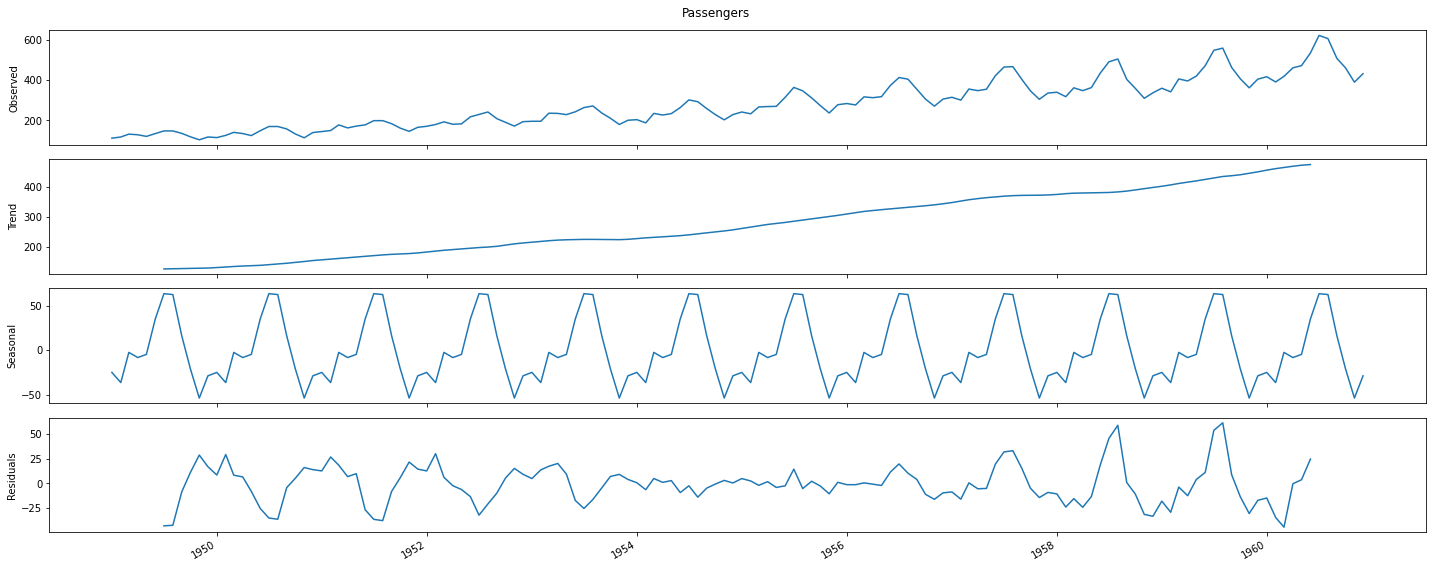

In [47]:
seasonal_decompose_1 = seasonal_decompose(airline_passengers.Passengers)
plot_seasonality(seasonal_decompose_1)

# Decompose using STL

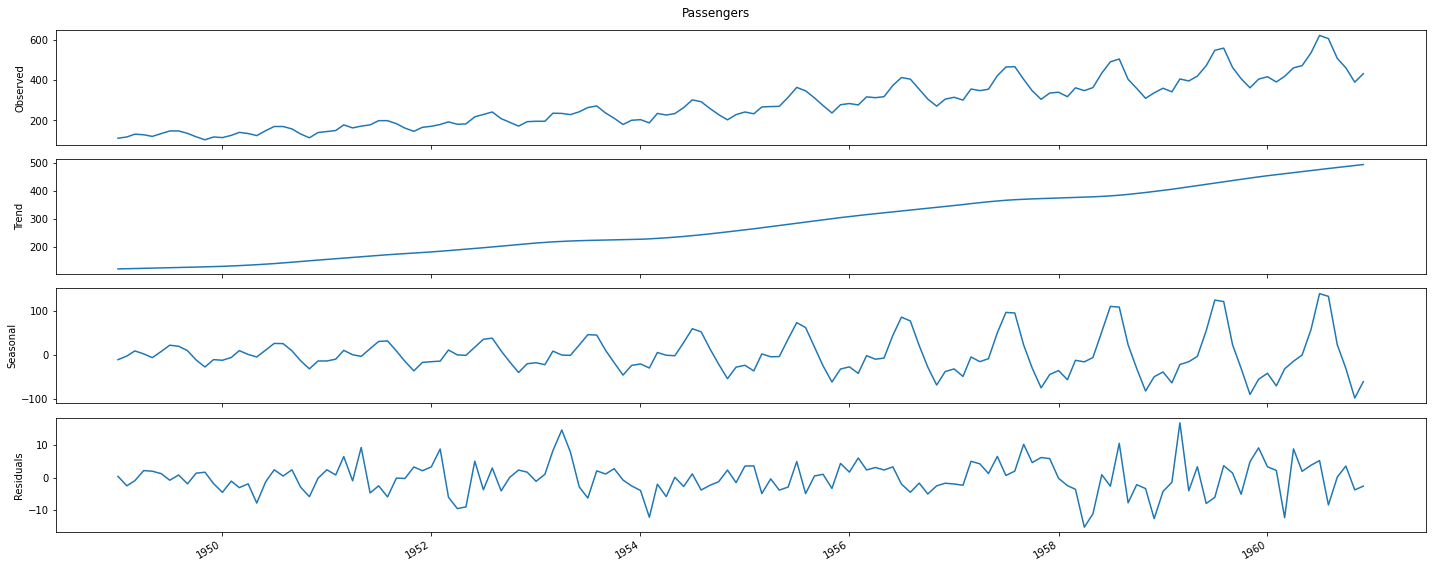

In [48]:
decomposition = STL(airline_passengers['Passengers'], period=12).fit()
plot_seasonality(decomposition)

# Manual plotting 

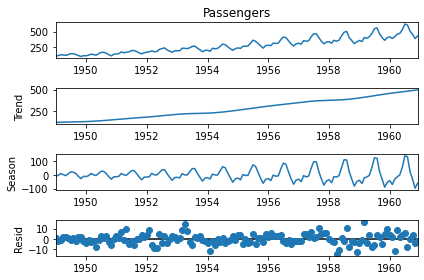

In [51]:
decomposition.plot();